<a href="https://colab.research.google.com/github/creepersguitar/SQL-/blob/main/4a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas and matplotlib prompt sheet for ESP

## Run this first

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
if not os.path.isfile('sampledata/ESP/Shoes.csv') :
  !rm -rf sampledata
  !git clone https://github.com/awchisholm/sampledata.git

Cloning into 'sampledata'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 294 (delta 103), reused 160 (delta 34), pack-reused 0
Receiving objects: 100% (294/294), 16.89 MiB | 27.15 MiB/s, done.
Resolving deltas: 100% (103/103), done.


## Read the csv file /content/sampledata/ESP/Shoes.csv into a pandas data frame - make sure you read the date column in 

Google for the parameter `parse_dates` to the function `pd.read_csv`


In [12]:
shoes = pd.read_csv('/content/sampledata/ESP/Shoes.csv', parse_dates=['Date'])
shoes.head()

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date
0,Ash,Adidas continental 80,80.0,1,1,2020-01-10
1,Joe,Adidas Falcon,43.0,1,10,2020-06-10
2,Tom,Adidas Originals ZX 750,80.0,1,0,2020-11-10
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16
4,Will,Adidas Yeezy Boost 350 V2 Cloud White (Non-Ref...,300.0,1,0,2020-10-21


## Create a new data frame column called `Price offered`.

Do this by multiplying the `Unit price GBP` column by the `Quantity bought` column.

In [19]:
shoes['Price offered'] = shoes['Unit price GBP'] * shoes['Quantity bought']


## Create a new data frame column called `Price paid`

Do this by multiplying the `Price offered` column by the `Discount percent` column and multiplying by 100 to get the discount. Then subtract this from `Price offered` to get the final `Price paid`.

You can do it in one line but if you prefer you can do it in multiple lines.

(percent means out of 100: per --> out of:  cent --> 100)

In [4]:
shoes['Price paid'] = shoes['Price offered'] - (shoes['Price offered'] * shoes['Discount percent'] / 100)

## Convert dates to be Python date time objects.

We are going to use the two variables below as dates to query the data but they are strings and need to be converted to date time objects. 

Google `pandas to_datetime`. Make sure you also choose the `dayfirst` parameter.

In [5]:
startdate_string = '01/01/2020'
enddate_string = '31/12/2020'
startdate = pd.to_datetime(startdate_string, dayfirst=True)
enddate = pd.to_datetime(enddate_string, dayfirst=True)

## Choose a name to search for

This is just a string - no need to do anything to it.

In [6]:
name = 'Joe'

## Search in the data frame for data between two dates and for the named person

This can be done in one line of code but you can do it in more if it makes it easier.

Hints: 

*   Google for `pandas loc`
*   Use `<=` and `>=` and `==` for less than or equal, greater than or equal and equals
*   Use `&` to logically AND things together
*   Google `pandas .copy()` - this copies the answer to a new variable



In [7]:
oneyear_shoes = shoes.loc[(shoes['Date'] >= startdate) & (shoes['Date'] <= enddate) & (shoes['Name'] == name)].copy()

## Find the total price paid for the named person between the dates

Use `sum()` to add entire columns.

In [8]:
total = oneyear_shoes['Price paid'].sum()
total

463.5

## Sort the data by `Date`

Google `pandas sort_values`. Also use the `inplace` parameter.

In [9]:
oneyear_shoes.sort_values(by='Date', inplace=True)

## Plot the price paid by date

Hints

*   Try `plt.scatter`
*   Try `plt.bar`
*   `plt.xticks` with a rotation changes the angle of the axes
*   `plt.title` makes a title
*   `plt.show` shows the plot







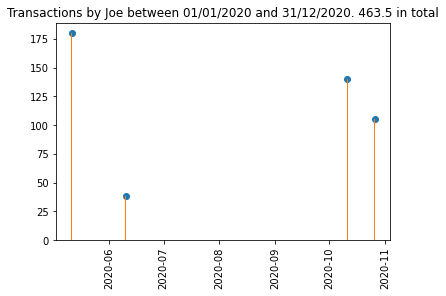

In [16]:
plt.scatter(oneyear_shoes['Date'], oneyear_shoes['Price paid'])
plt.bar(oneyear_shoes['Date'], oneyear_shoes['Price paid'])
plt.xticks(rotation=90) 
plt.title('Transactions by ' + name + ' between ' + startdate_string + ' and ' + enddate_string + '. ' + str(total) + ' in total')
plt.show()

## Plot all names for all time using different colours (advanced)

Hints

*   Google `plt.subplots`
*   Google `pandas groupby` to group data for different names together
*   Google iterating over a group to work out how to plot each group one by one





KeyError: ignored

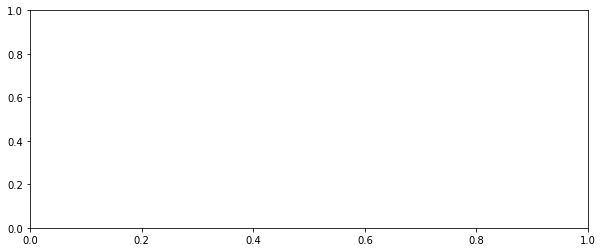

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
for key, grp in shoes.groupby(['Name']):
    ax.scatter(grp['Date'], grp['Price paid'], label=key)

ax.legend()
plt.xticks(rotation=90)
plt.show()